# Classifying with scikit-learn Estimators

The scikit-learn library is a collection of data mining algorithms, written in Python and using a common programming interface. Here, we focus on setting up a good framework for running data mining
procedures. 

Key concepts:
- **Estimators**: This is to perform classification, clustering, and regression
- **Transformers**: This is to perform preprocessing and data alterations
- **Pipelines**: This is to put together your workflow into a replicable format

## scikit-learn estimators

Estimators are `scikit-learn`'s abstraction, allowing for the standardized implementation of a large number of classification algorithms. Estimators are used for classification. Estimators have the following two main functions:
- `fit()`: This performs the training of the algorithm and sets internal parameters. It takes two inputs, the training sample dataset and the corresponding classes for those samples.
- `predict()`: This predicts the class of the testing samples that is given as input. This function returns an array with the predictions of each input testing sample.

Most `scikit-learn` estimators use the NumPy arrays or a related format for input and output.

There are a large number of estimators in scikit-learn. These include **support vector machines (SVM)**, **random forests**, and **neural networks**. Here, we will use a different estimator from scikit-learn: **nearest neighbor**.

## Nearest neighbors

**Nearest neighbors** is perhaps one of the most intuitive algorithms in the set of standard data mining algorithms. To predict the class of a new sample, we look through the training dataset for the samples that are most similar to our new sample. We take the most similar sample and predict the class that the majority of those samples have.

**Example**: If we wish to predict the class of the triangle, based on which class it is more similar to (represented here by having similar objects closer together). We seek the three nearest neighbors, which are two diamonds and one square. There are more diamonds than circles, and the predicted class for the triangle is, therefore, a diamond:

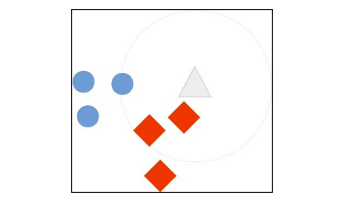

**Caution**: Nearest neighbors can be used for nearly any dataset-however, it can be very computationally expensive to compute the distance between all pairs of samples. For example if there are 10 samples in the dataset, there are 45 unique distances to compute. However, if there are 1000 samples, there are nearly 500,000! Various methods exist for improving this speed dramatically. It can also do poorly in categorical-based datasets, and another algorithm should be used for these instead.

## Distance metrics

A key underlying concept in data mining is that of distance. If we have two samples, we need to know how close they are to each other. Further more, we need to answer questions such as are these two samples more similar than the other two? Answering questions like these is important to the outcome of the case

The most common distance metric that the people are aware of is **Euclidean** distance, which is the real-world distance. If you were to plot the points on a graph and measure the distance with a straight ruler, the result would be the Euclidean distance. A little more formally, it is the square root of the sum of the squared distances for each feature.

Euclidean distance is intuitive, but provides poor accuracy if some features have larger values than others. It also gives poor results when lots of features have a value of 0, known as a sparse matrix. There are other distance metrics in use; two commonly employed ones are the *Manhattan* and *Cosine* distance.

The **Manhattan** distance is the sum of the absolute differences in each feature (with no use of square distances). Intuitively, it can be thought of as the number of moves a rook piece (or castle) in chess would take to move between the points, if it were limited to moving one square at a time. While the Manhattan distance does suffer if some features have larger values than others, the effect is not as dramatic as in the
case of Euclidean.

The **Cosine** distance is better suited to cases where some features are larger than others and when there are lots of zeros in the dataset. Intuitively, we draw a line from the origin to each of the samples, and measure the angle between those lines. This can be seen in the following diagram:

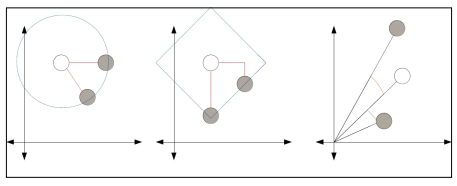

In this example, each of the grey circles are in the same distance from the white circle:

- In the first graph, the distances are Euclidean, and therefore, similar distances fit around a circle
- In the second graph, the distances are Manhattan, also called City Block. We compute the distance by moving across rows and columns, similar to how a Rook (Castle) in Chess moves.
- In the third graph, we have the Cosine distance that is measured by computing the angle between the lines
drawn from the sample to the vector, and ignore the actual length of the line.

## Loading the dataset

The dataset we are going to use is called *Ionosphere*, which is the recording of many high-frequency antennas. The aim of the antennas is to determine whether there is a structure in the ionosphere and a region in the upper atmosphere. Those that have a structure are deemed good, while those that do not are deemed bad. The aim of this application is to build a data mining classifier that can determine whether an image is good or bad.

In [18]:
DATA = 'data/'
IONOSPHERE = 'ionosphere/'
AFFINITY_DATASET = DATA + IONOSPHERE+ 'ionosphere.data'

In [19]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(AFFINITY_DATASET, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

## Moving towards a standard workflow

Estimators in `scikit-learn` have two main functions: `fit()` and `predict()`. We train the algorithm using the *fit* method and our training set. We evaluate it using the *predict* method on our testing set.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print(f"There are {X_train.shape[0]} samples in the training dataset")
print(f"There are {X_test.shape[0]} samples in the testing dataset")
print(f"Each sample has {X_train.shape[1]} features")

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [21]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [22]:
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


This scores 86.4 percent accuracy, which is impressive for a default algorithm and just a few lines of code! Most `scikit-learn` default parameters are chosen explicitly to work well with a range of datasets. However, you should always aim to choose parameters based on knowledge of the application experiment.

## Running the algorithm

Note that we set aside a portion of the dataset as a testing set, with the rest being the training set. We train our algorithm on the training set and evaluate how effective it will be based on the testing set. 

However, what happens if we get lucky and choose an easy testing set? Alternatively, what if it was particularly troublesome? We can discard a good model due to poor results resulting from such an "unlucky" split of our data.

The **cross-fold validation** framework is a way to address the problem of choosing a testing set and a standard methodology in data mining. The procedure is as follows:

1. Split the entire dataset into a number of sections called folds.
2. For each fold in the dataset, execute the following steps:
    - Set that fold aside as the current testing set
    - Train the algorithm on the remaining folds
    - Evaluate on the current testing set
3. Report on all the evaluation scores, including the average score.
4. In this process, each sample is used in the testing set only once.

**This reduces (but doesn't completely eliminate) the likelihood of choosing lucky testing sets.**

The scikit-learn library contains a number of cross fold validation methods. A `helper` function is given that performs the preceding procedure.

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


This gives a slightly more modest result of 82.3 percent, but it is still quite good considering we have not yet tried setting better parameters.

## Setting parameters

Almost all data mining algorithms have parameters that the user can set. This is often a cause of generalizing an algorithm to allow it to be applicable in a wide variety of circumstances. Setting these parameters can be quite difficult, as choosing good parameter values is often highly reliant on features of the dataset.

**The nearest neighbor algorithm has several parameters, but the most important one is that of the number of nearest neighbors** to use when predicting the class of an unseen attribution. In scikit-learn, this parameter is called n_neighbors.

In the following figure, we show that when this number is too low, a randomly labeled sample can cause an error. In contrast, when it is too high, the actual nearest neighbors have a lower effect on the result:

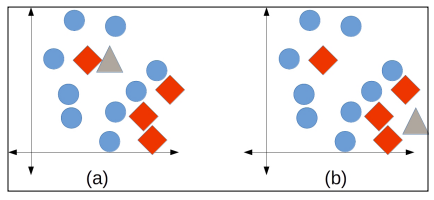

- On the left-hand side, we would usually expect the test sample (the triangle) to be classified as a circle. However, if n_neighbors is 1, the single red diamond in this area (likely a noisy sample) causes the sample to be predicted as being a diamond, while it appears to be in a blue area. 
- On the right-hand side, we would usually expect the test sample to be classified as a diamond. However, if n_neighbors is 7, the three nearest neighbors (which are all diamonds) are overridden by the large number of circle samples.

If we want to test a number of values for the `n_neighbors` parameter, for example, each of the values from 1 to 20, we can rerun the experiment many times by setting `n_neighbors` and observing the result:

In [26]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

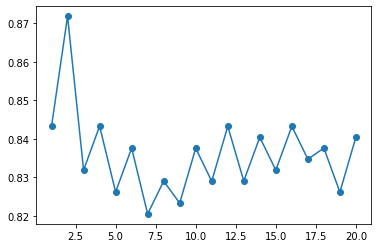

In [72]:
from matplotlib import pyplot as plt
plt.plot(parameter_values, avg_scores, '-o')
#plt.axis([0, max(parameter_values), 0, 1.0])

While there is a lot of variance, the plot shows a decreasing trend as the number of neighbors increases.

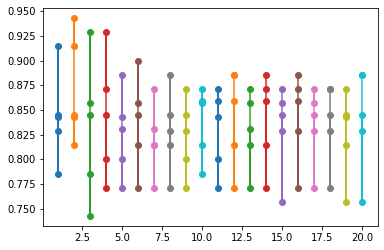

In [34]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

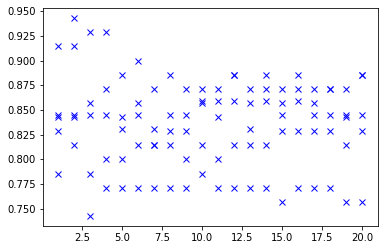

In [35]:
plt.plot(parameter_values, all_scores, 'bx')

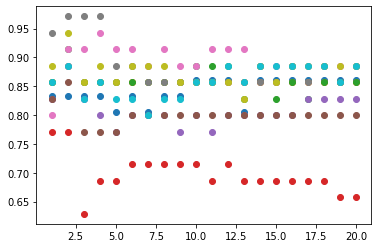

In [71]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
    all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

## Preprocessing using pipelines

When taking measurements of real-world objects, we can often get features in very different ranges. For instance, if we are measuring the qualities of an animal, we might have several features, as follows:

- **Number of legs**: This is between the range of 0-8 for most animals, while some have many more!
- **Weight**: This is between the range of only a few micrograms, all the way to a blue whale with a weight of 190,000 kilograms!
- **Number of hearts**: This can be between zero to five, in the case of the earthworm.

For a mathematical-based algorithm to compare each of these features, the differences in the scale, range, and units can be difficult to interpret. If we used the above features in many algorithms, the weight would probably be the most influential feature due to only the larger numbers and not anything to do with the
actual effectiveness of the feature.

One of the methods to overcome this is to use a process called preprocessing to *normalize* the features so that they all have the same range, or are put into categories like *small*, *medium* and *large*. Suddenly, the large difference in the types of features has less of an impact on the algorithm, and can lead to large
increases in the accuracy.

Preprocessing can also be used to choose only the more effective features, create new features, and so on. Preprocessing in `scikit-learn` is done through Transformer objects, which take a dataset in one form and return an altered dataset after some transformation of the data. These don't have to be numerical, as Transformers are also used to extract features-however, in this section, we will stick with preprocessing.

## An example

We can show an example of the problem by breaking the Ionosphere dataset. While this is only an example, many real-world datasets have problems of this form.

In [85]:
X_broken = np.array(X)
X_broken[:,::2] /= 10

estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy')
print(f"The original average accuracy for is {np.mean(original_scores) * 100:.1f}%")
broken_scores = cross_val_score(estimator, X_broken, y, scoring='accuracy')
print(f"The 'broken' average accuracy for is {np.mean(broken_scores) * 100:.1f}%")

The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


This gives a score of 82.6 percent for the original dataset, which drops down to 73.8 percent on the broken dataset. We can fix this by scaling all the features to the range 0 to 1.

## Standard preprocessing

There are various other forms of normalizing in this way, which is effective for other applications and feature types:

- Ensure the sum of the values for each sample equals to 1, using `sklearn.preprocessing.Normalizer`
- Force each feature to have a zero mean and a variance of 1, using `sklearn.preprocessing.StandardScaler`, which is a commonly used starting point for normalization
- Turn numerical features into binary features, where any value above a threshold is 1 and any below is 0, using `sklearn.preprocessing.Binarizer`

## Putting it all together

In [86]:
from sklearn.preprocessing import MinMaxScaler

X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The average accuracy for is 82.9%


This gives us back a score of 82.9 percent accuracy. The `MinMaxScaler` resulted in features of the same scale, meaning that no features overpowered others by simply being bigger values. While the Nearest Neighbor algorithm can be confused with larger features, some algorithms handle scale differences better. In contrast, some are much worse!

## Pipelines

As experiments grow, so does the complexity of the operations. We may split up our dataset, binarize features, perform feature-based scaling, perform sample-based scaling, and many more operations.

Keeping track of all of these operations can get quite confusing and can result in being unable to replicate the result. Problems include forgetting a step, incorrectly applying a transformation, or adding a transformation that wasn't needed.

Another issue is the order of the code. In the previous section, we created our `X_transformed` dataset and then created a new estimator for the cross validation. If we had multiple steps, we would need to track all of these changes to the dataset in the code.

Pipelines are a construct that addresses these problems. Pipelines store the steps in your data mining workflow. They can take your raw data in, perform all the necessary transformations, and then create
a prediction. This allows us to use pipelines in functions such as *cross_val_score*, where they expect an estimator.

In [87]:
from sklearn.pipeline import Pipeline

scaling_pipeline = Pipeline([('scale', MinMaxScaler()), ('predict', KNeighborsClassifier())])
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print(f"The pipeline scored an average accuracy for is {np.mean(transformed_scores) * 100:.1f}%")

The pipeline scored an average accuracy for is 82.9%
